# Identifying Key Predictors of Voluntary Employee Turnover - Exploratory Data Analysis
*By Sophia Jensen and Duy Nguyen | July 2025*
<br> This notebooks is used to explore and prepare the data for training, testing, and model evaluation

## Set-up Import Packages and load data into a dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Connect to database
#conn = sqlite3.connect("/Users/duynguyen/Documents/Documents - DUY’s Mac mini/GitHub/ADS599_CapstoneProject/data/fevs_data_cleaned.db")
conn = sqlite3.connect("/Users/sophie/Downloads/ADS599_CapstoneProject/data/fevs_data_cleaned.db") # sophia path
# Cleaned SELECT query
query = """
SELECT year, dsex, deduc, dfedten, dsuper, dminority, dleaving,
       q1, q2, q3, q4, q5, q6, q7, q8, q9, q10,
       q11, q12, q13, q14, q17, q18, q19, q20,
       q21, q22, q23, q24, q25, q26, q27, q28, q29, q30,
       q31, q32, q33, q34, q35, q36, q37, q38
FROM fevs_cleaned_all_years
WHERE dleaving IS NOT NULL;
"""

# Load data
df = pd.read_sql(query, conn)
conn.close()

# Preview results
df.head(20)

,year,dsex,deduc,dfedten,dsuper,dminority,dleaving,q1,q2,q3,...,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38
0,2018,A,B,A,A,A,A,4.0,4.0,4.0,...,4,3,3,X,None,X,4,4,X,X
1,2018,A,B,A,A,B,C,2.0,3.0,4.0,...,2,2,4,2,4,4,4,2,3,3
2,2018,A,B,A,A,A,A,4.0,4.0,5.0,...,4,4,5,5,4,3,5,4,5,4
3,2018,A,A,A,A,B,B,3.0,2.0,3.0,...,3,3,3,3,2,3,4,4,4,4
4,2018,A,C,A,A,B,B,5.0,4.0,4.0,...,5,5,5,5,5,5,5,5,5,5
5,2018,B,A,B,A,B,B,2.0,1.0,2.0,...,3,2,3,3,2,2,1,4,1,1
6,2018,A,B,A,A,B,A,2.0,5.0,5.0,...,4,3,4,4,2,4,4,4,5,5
7,2018,A,B,A,A,B,A,4.0,4.0,4.0,...,4,4,4,4,4,4,4,4,4,4
8,2018,A,B,A,B,B,A,5.0,4.0,4.0,...,5,5,4,4,4,4,4,4,4,5
9,2018,B,C,B,A,B,D,2.0,4.0,4.0,...,4,4,4,4,2,4,4,4,4,4


## Examine shape, size, and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152164 entries, 0 to 3152163
Data columns (total 43 columns):
 #   Column     Dtype  
---  ------     -----  
 0   year       int64  
 1   dsex       object 
 2   deduc      object 
 3   dfedten    object 
 4   dsuper     object 
 5   dminority  object 
 6   dleaving   object 
 7   q1         float64
 8   q2         float64
 9   q3         float64
 10  q4         float64
 11  q5         object 
 12  q6         object 
 13  q7         object 
 14  q8         object 
 15  q9         object 
 16  q10        object 
 17  q11        object 
 18  q12        object 
 19  q13        object 
 20  q14        object 
 21  q17        object 
 22  q18        object 
 23  q19        object 
 24  q20        object 
 25  q21        object 
 26  q22        object 
 27  q23        object 
 28  q24        object 
 29  q25        object 
 30  q26        object 
 31  q27        object 
 32  q28        object 
 33  q29        object 
 34  q30        object 

In [5]:
#convert objects to numeric values for processing and change 'X' and 'none' values to NA

# Define letter-to-float mapping: A → 0.0, B → 1.0, ...
letter_map = {chr(i): float(i - 65) for i in range(65, 91)}

# Replace 'X' and 'None' strings with NaN
df.replace(['X', 'None'], np.nan, inplace=True)

# Convert categorical letter columns
letter_cols = ['dsex', 'deduc', 'dfedten', 'dsuper', 'dminority', 'dleaving']
for col in letter_cols:
    df[col] = df[col].map(letter_map)

# Convert remaining object columns (like q1–q38) to float
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Optional: check data types
print(df.dtypes)

year           int64
dsex         float64
deduc        float64
dfedten      float64
dsuper       float64
dminority    float64
dleaving     float64
q1           float64
q2           float64
q3           float64
q4           float64
q5           float64
q6           float64
q7           float64
q8           float64
q9           float64
q10          float64
q11          float64
q12          float64
q13          float64
q14          float64
q17          float64
q18          float64
q19          float64
q20          float64
q21          float64
q22          float64
q23          float64
q24          float64
q25          float64
q26          float64
q27          float64
q28          float64
q29          float64
q30          float64
q31          float64
q32          float64
q33          float64
q34          float64
q35          float64
q36          float64
q37          float64
q38          float64
dtype: object


In [6]:
df.describe

<bound method NDFrame.describe of          year  dsex  deduc  dfedten  dsuper  dminority  dleaving   q1   q2  \
0        2018   0.0    1.0      0.0     0.0        0.0       0.0  4.0  4.0   
1        2018   0.0    1.0      0.0     0.0        1.0       2.0  2.0  3.0   
2        2018   0.0    1.0      0.0     0.0        0.0       0.0  4.0  4.0   
3        2018   0.0    0.0      0.0     0.0        1.0       1.0  3.0  2.0   
4        2018   0.0    2.0      0.0     0.0        1.0       1.0  5.0  4.0   
...       ...   ...    ...      ...     ...        ...       ...  ...  ...   
3152159  2024   1.0    NaN      1.0     1.0        NaN       0.0  4.0  5.0   
3152160  2024   1.0    NaN      1.0     1.0        NaN       3.0  5.0  5.0   
3152161  2024   0.0    NaN      2.0     0.0        NaN       1.0  4.0  5.0   
3152162  2024   0.0    NaN      2.0     0.0        NaN       0.0  5.0  5.0   
3152163  2024   1.0    NaN      1.0     1.0        NaN       0.0  5.0  4.0   

          q3  ...  q29  q30  

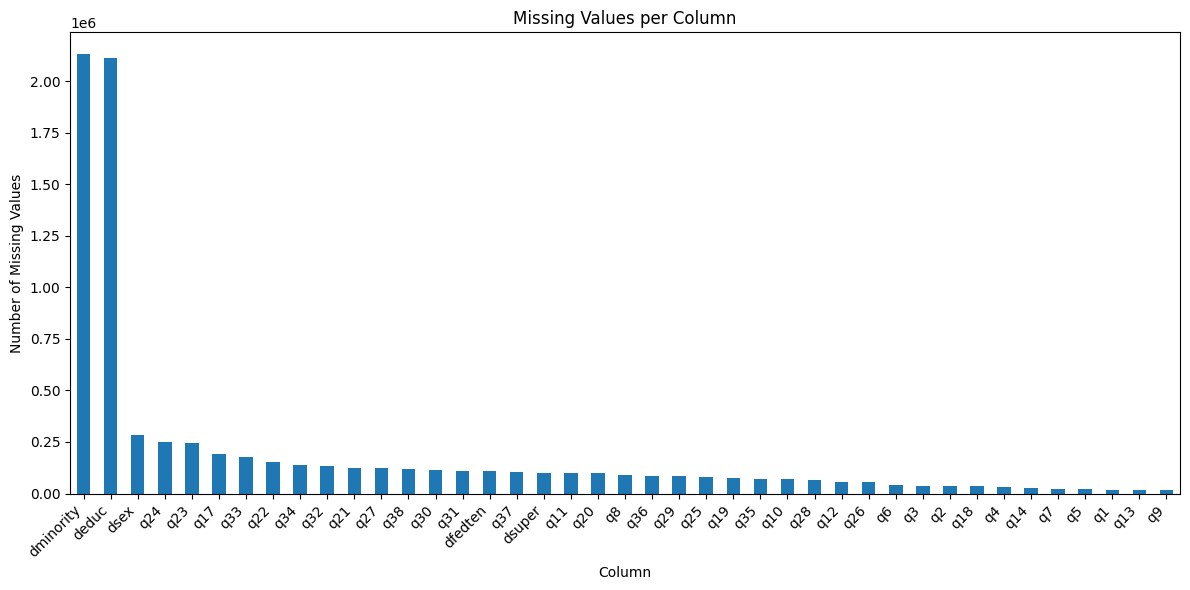

In [7]:
missing_counts = df.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Minority and highest degree/level of education will be removed from the dataset prior to modeling due to the high number of missing values

In [ ]:
#Explore demographic distribution of categorical variables

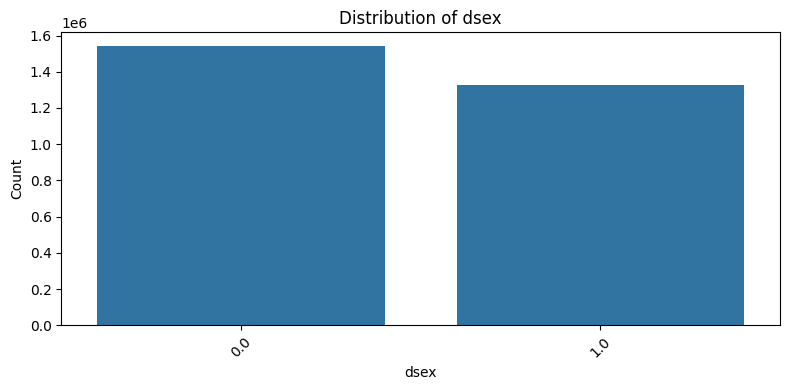

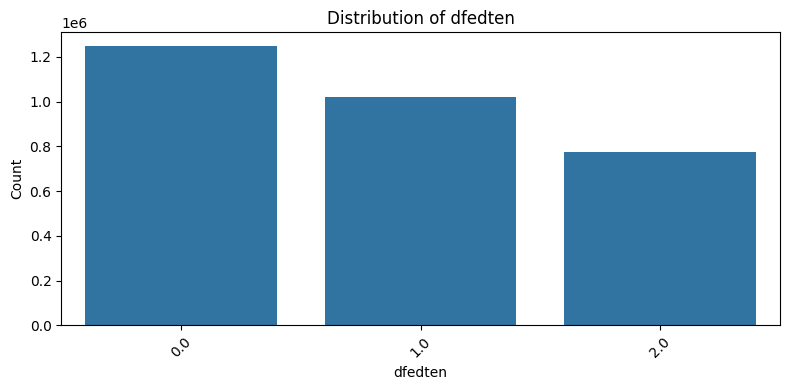

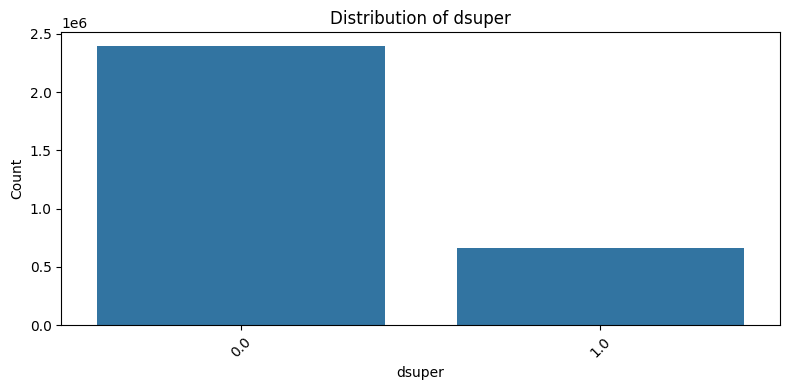

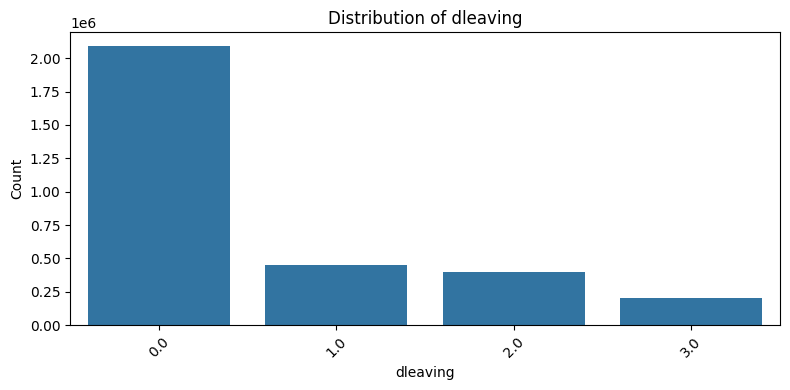

In [8]:
cols_to_check = ['dsex', 'dfedten', 'dsuper', 'dleaving']

for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

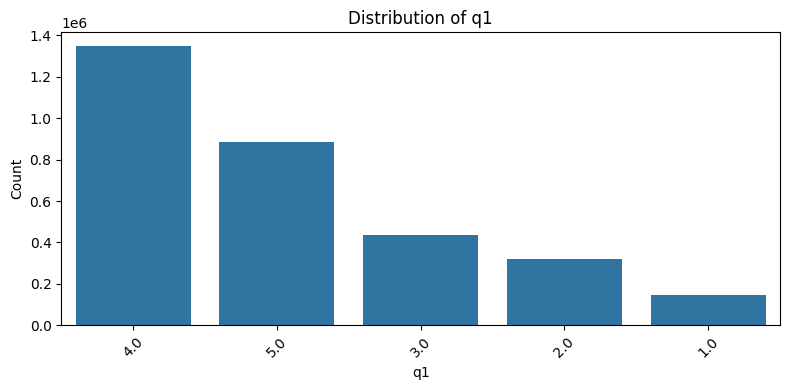

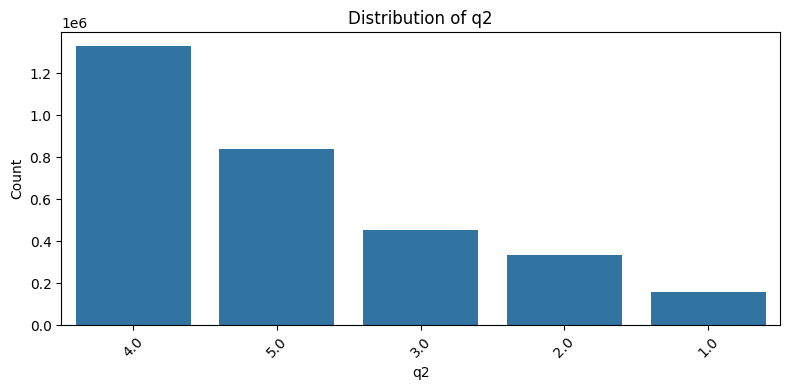

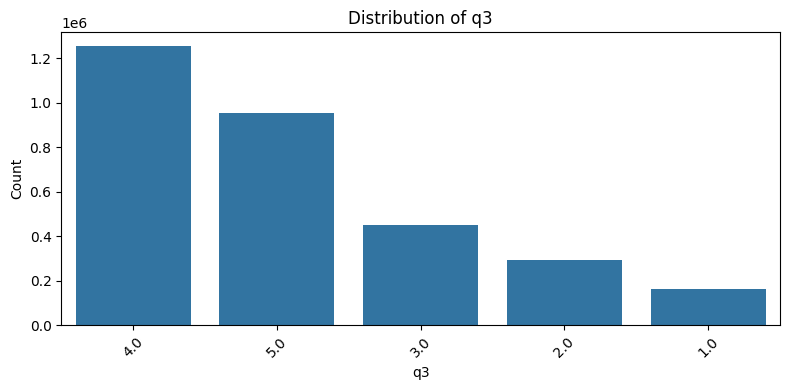

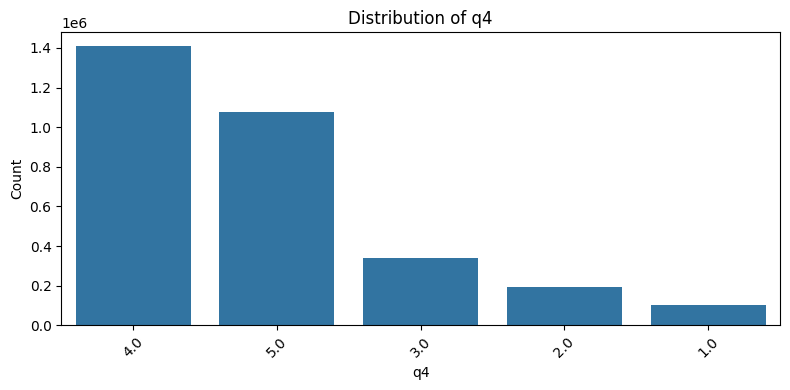

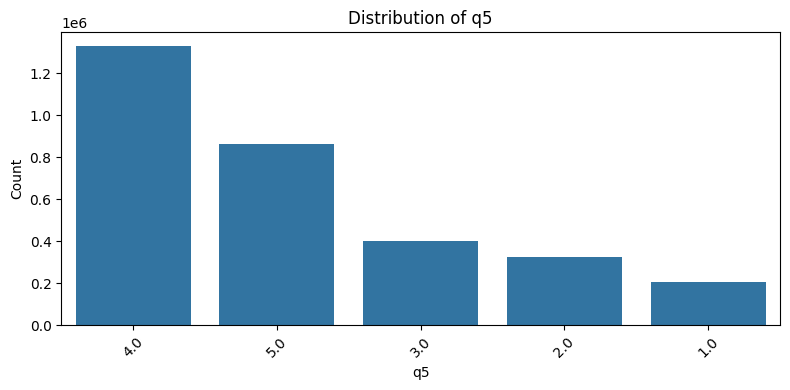

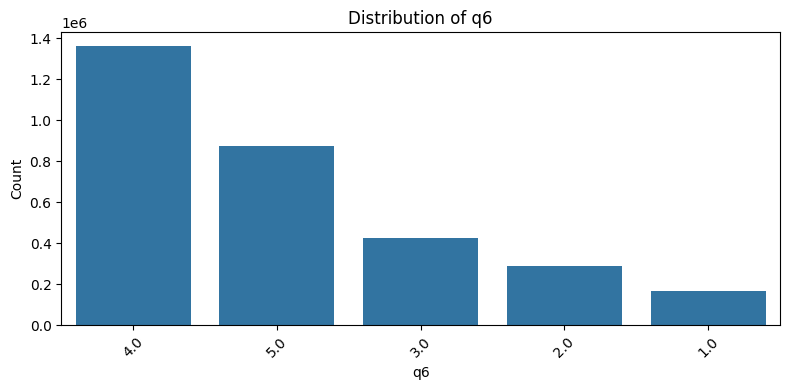

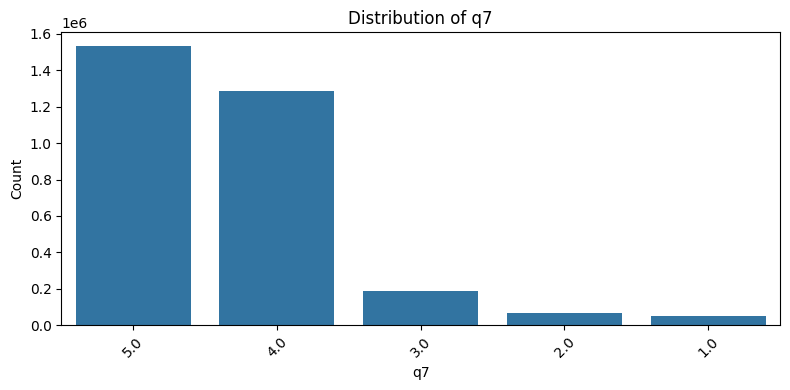

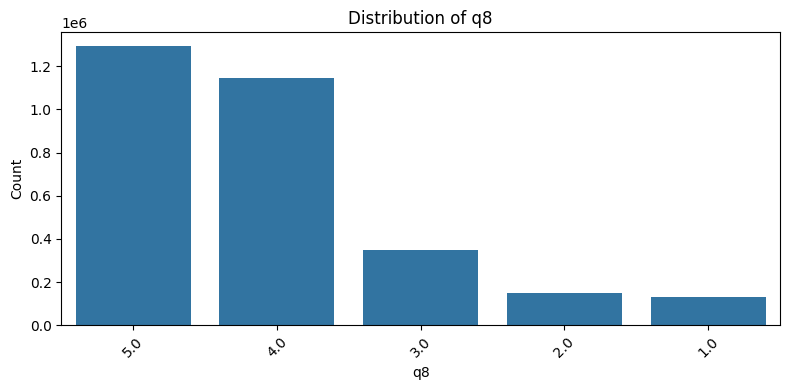

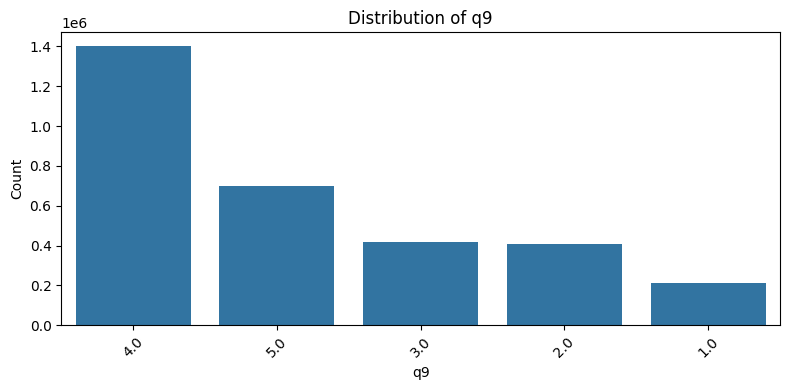

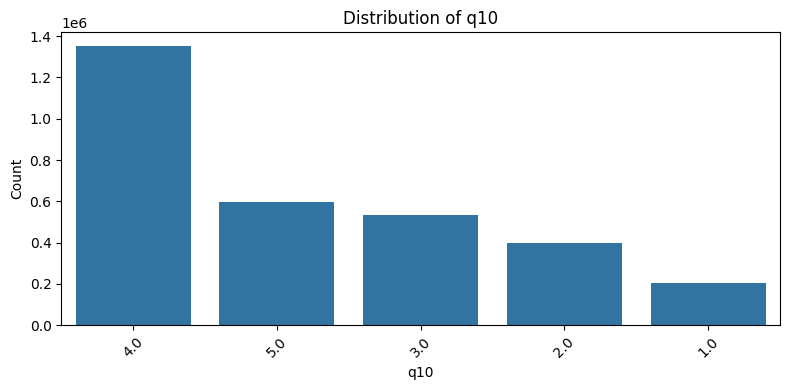

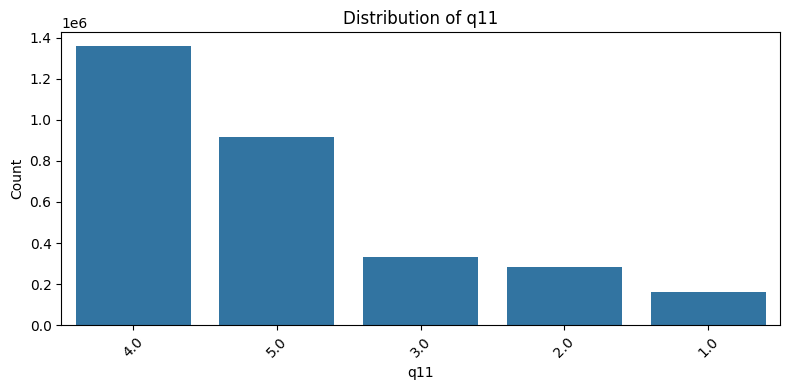

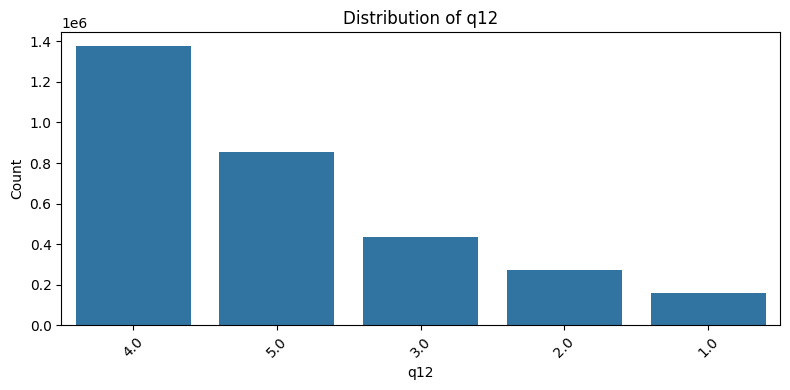

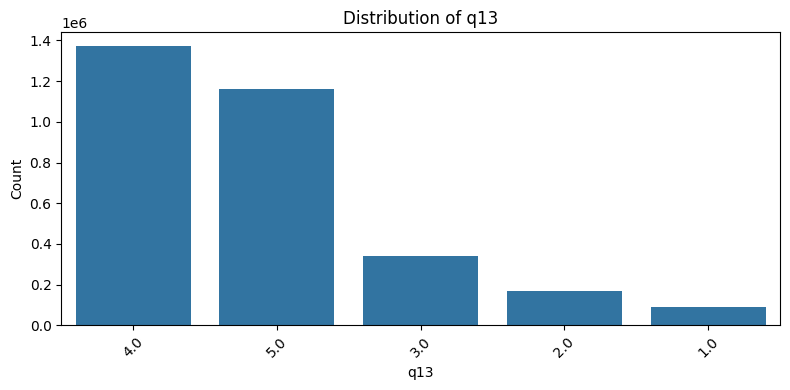

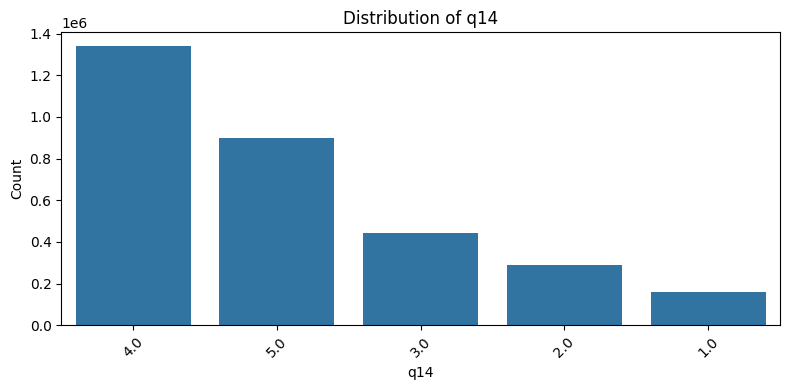

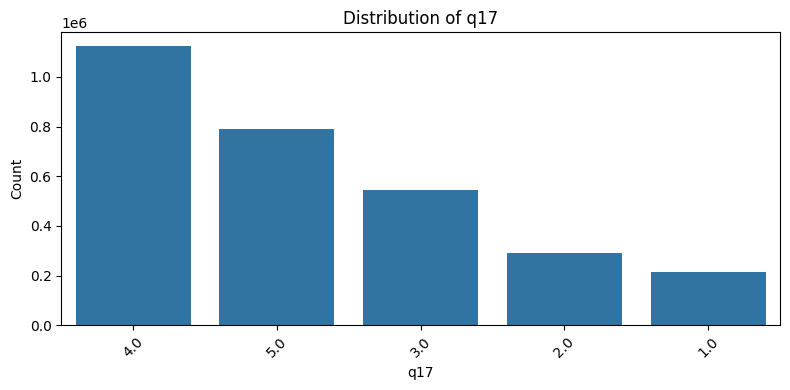

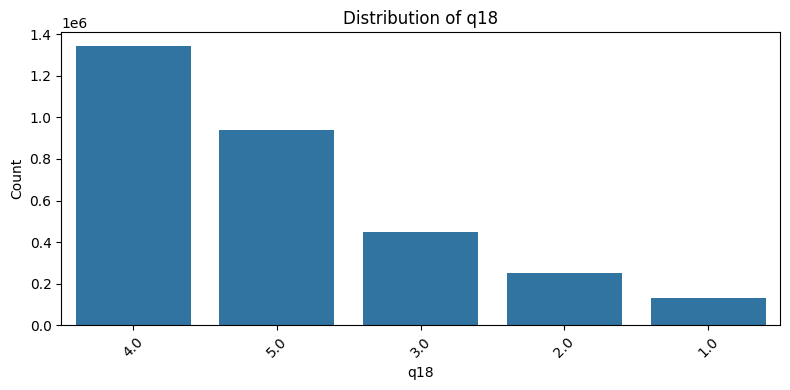

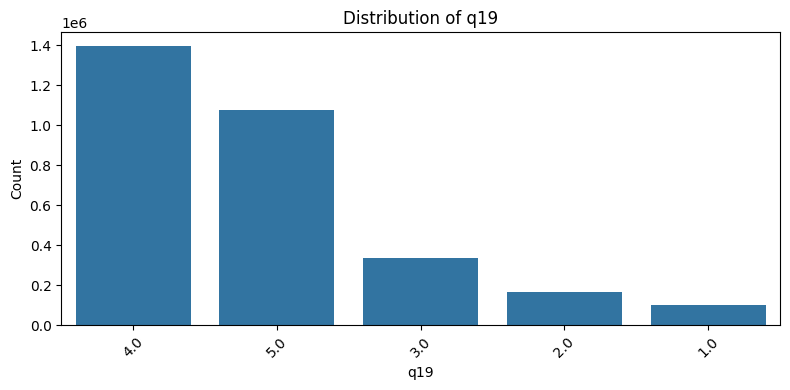

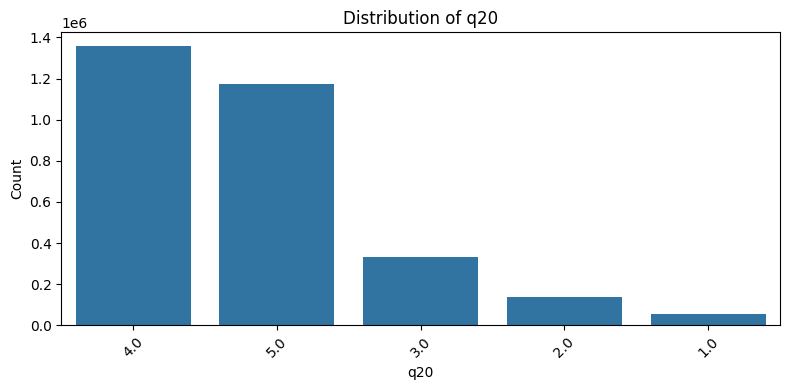

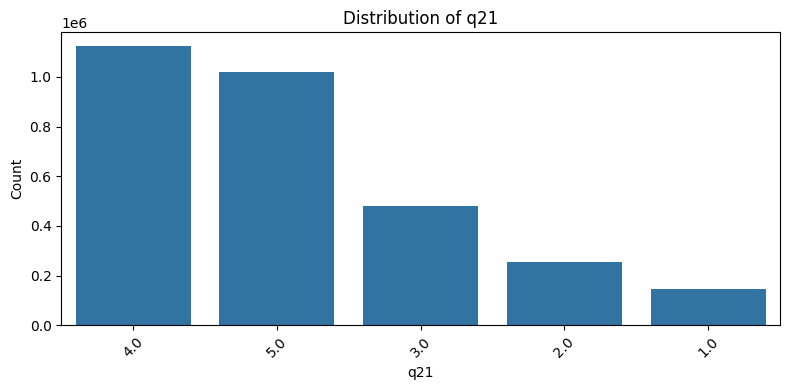

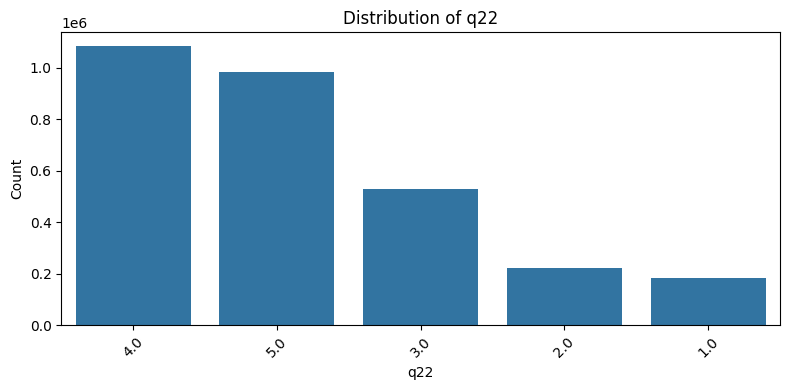

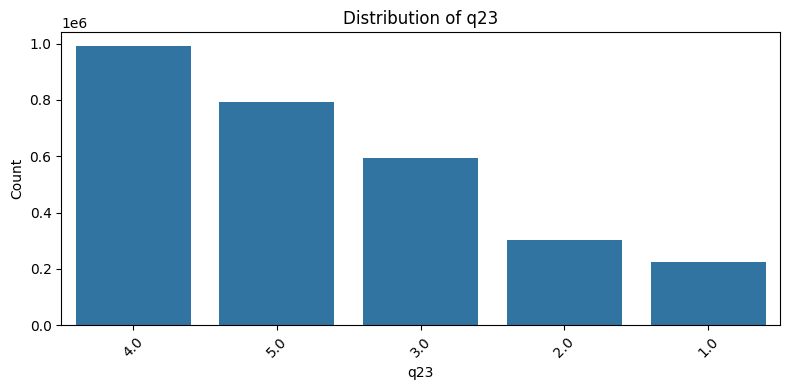

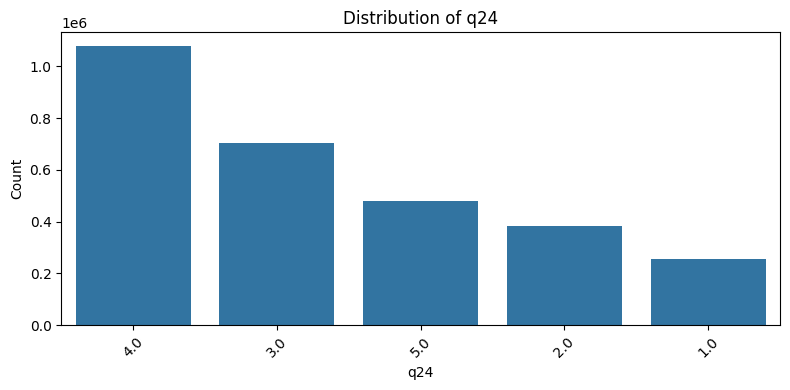

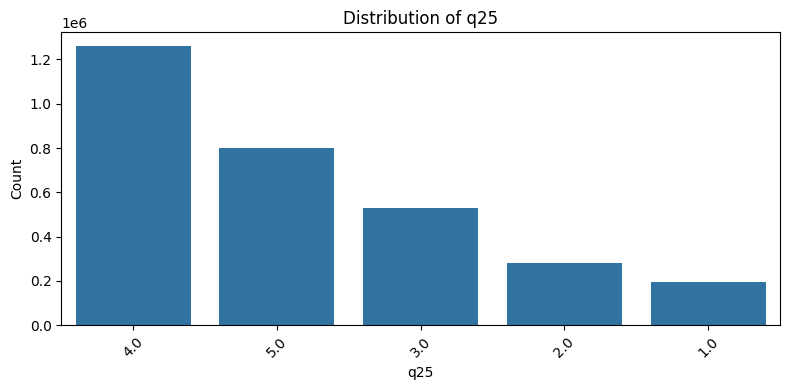

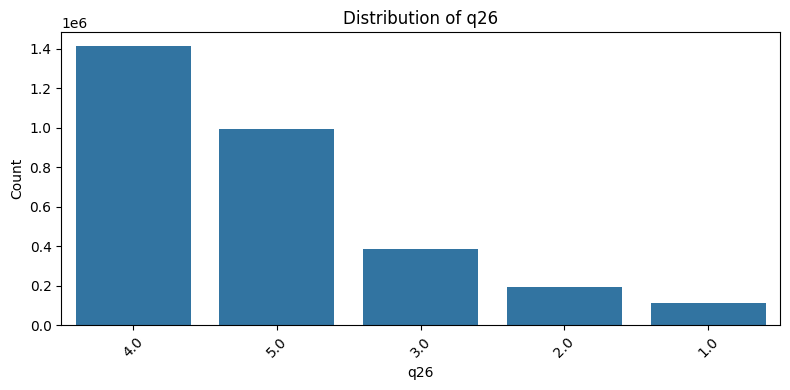

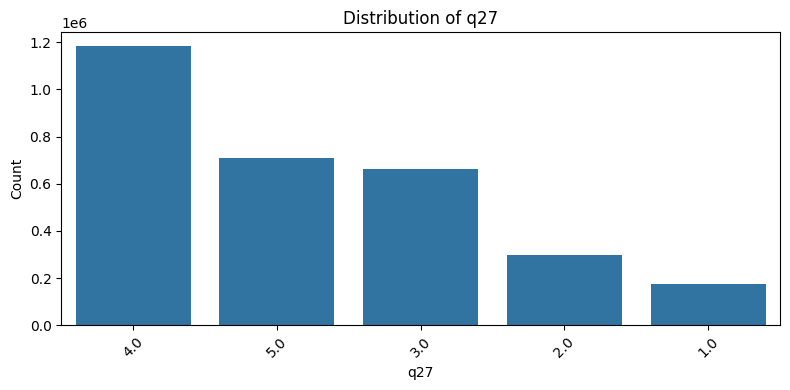

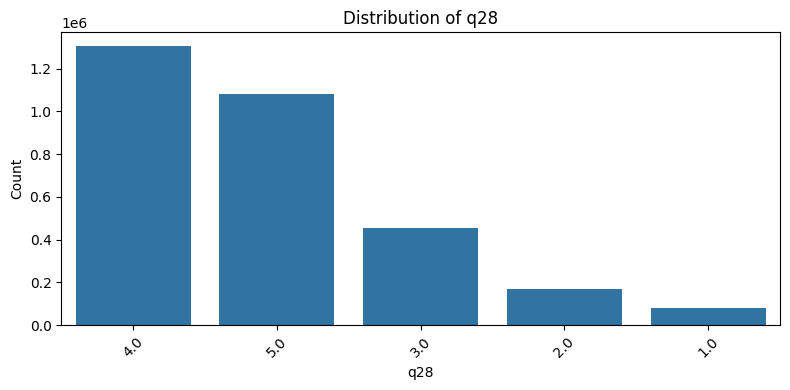

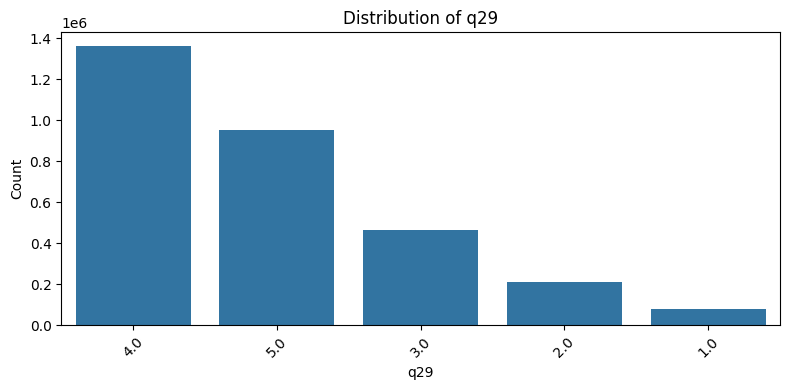

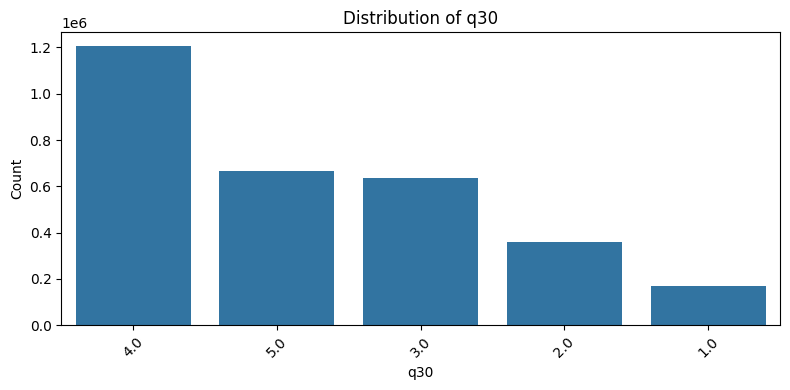

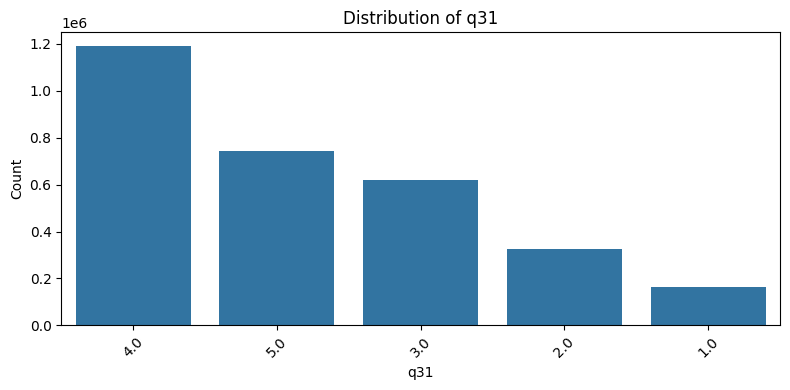

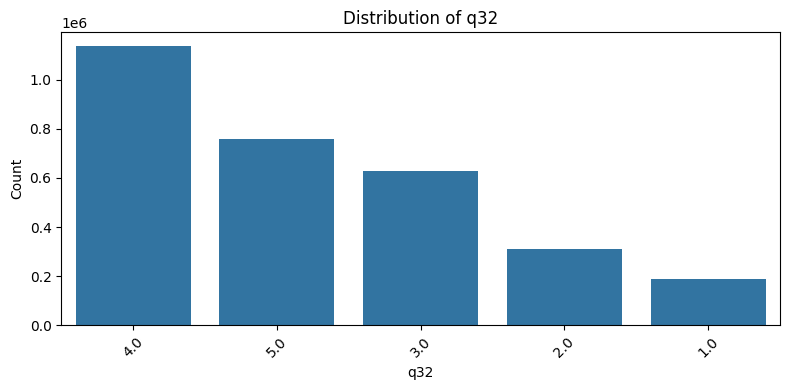

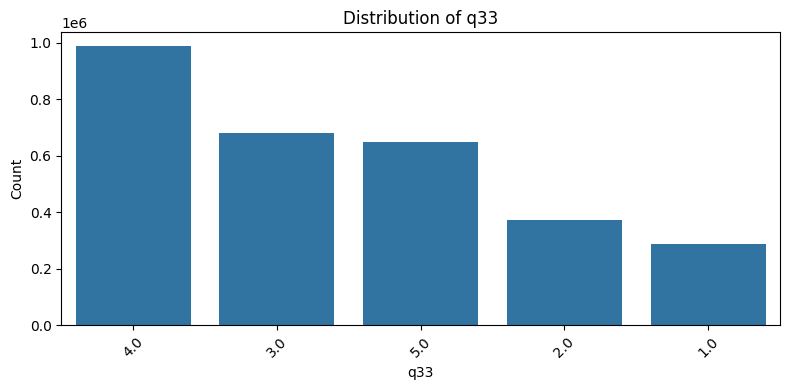

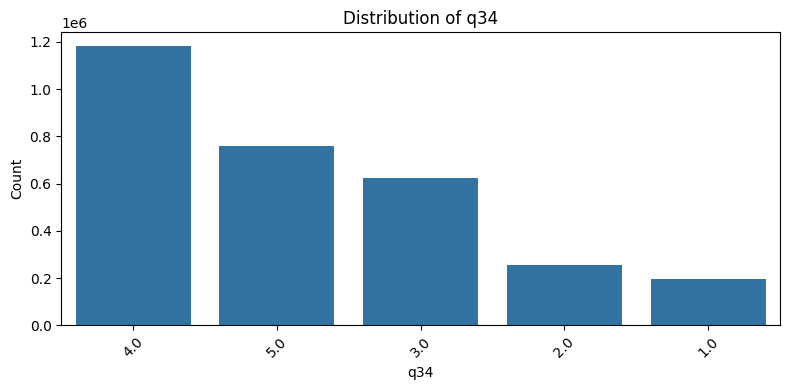

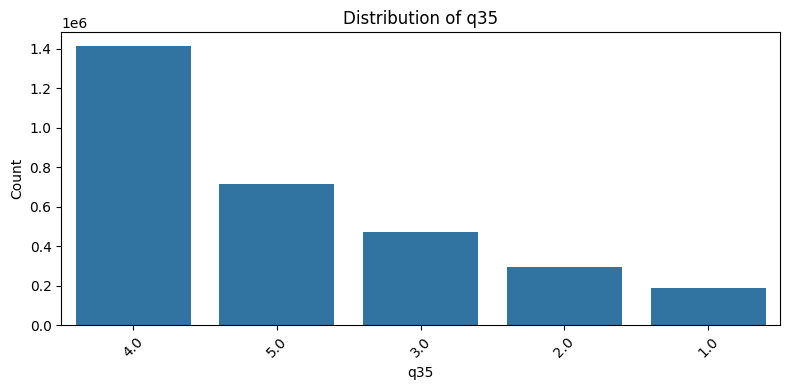

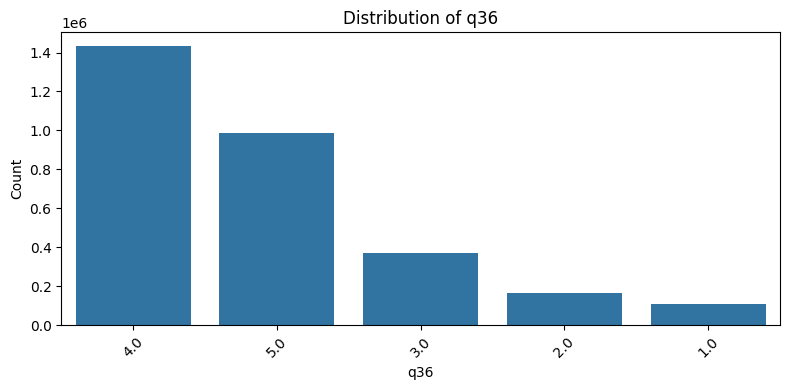

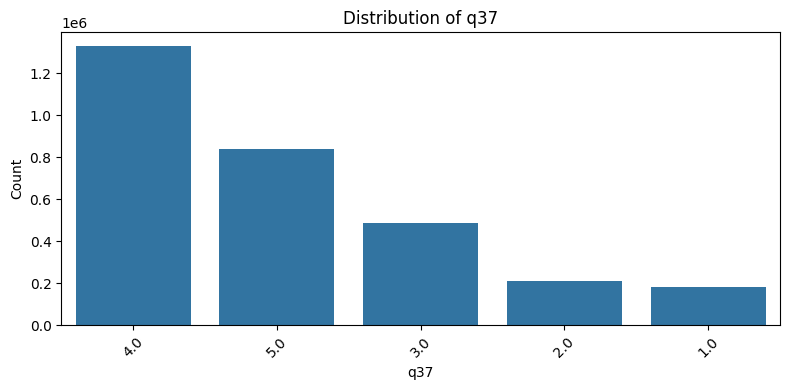

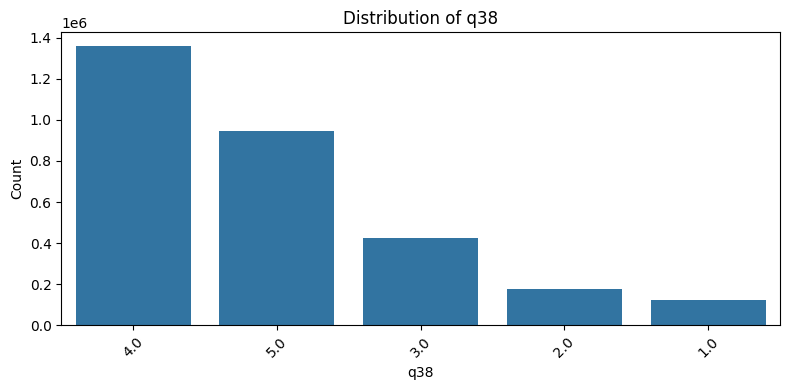

In [9]:
cols_to_check = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'q11', 'q12', 'q13', 'q14', 'q17', 'q18', 'q19', 'q20',
       'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30',
       'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38']

for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

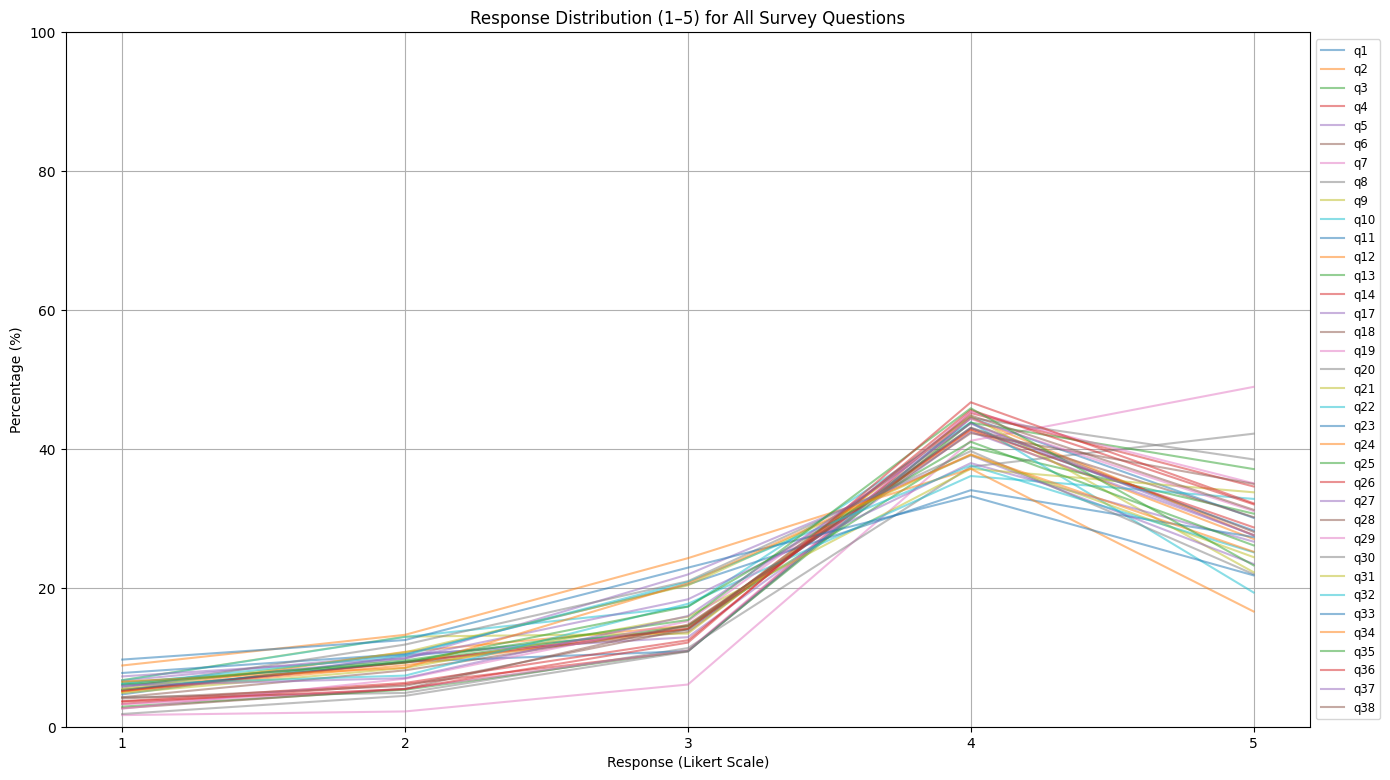

In [10]:
distribution_df = pd.DataFrame()

# Loop through Likert-style questions
for col in cols_to_check:
    counts = df[col].value_counts(normalize=True, dropna=True).sort_index() * 100
    counts.name = col
    distribution_df = pd.concat([distribution_df, counts], axis=1)

# Transpose: rows = questions, columns = Likert responses 1–5
distribution_df = distribution_df.T.fillna(0)

# Plot
plt.figure(figsize=(14, 8))

for question in distribution_df.index:
    plt.plot(distribution_df.columns, distribution_df.loc[question], label=question, alpha=0.5)

plt.title("Response Distribution (1–5) for All Survey Questions")
plt.xlabel("Response (Likert Scale)")
plt.ylabel("Percentage (%)")
plt.xticks([1, 2, 3, 4, 5])
plt.ylim(0, 100)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize='small')
plt.tight_layout()
plt.show()

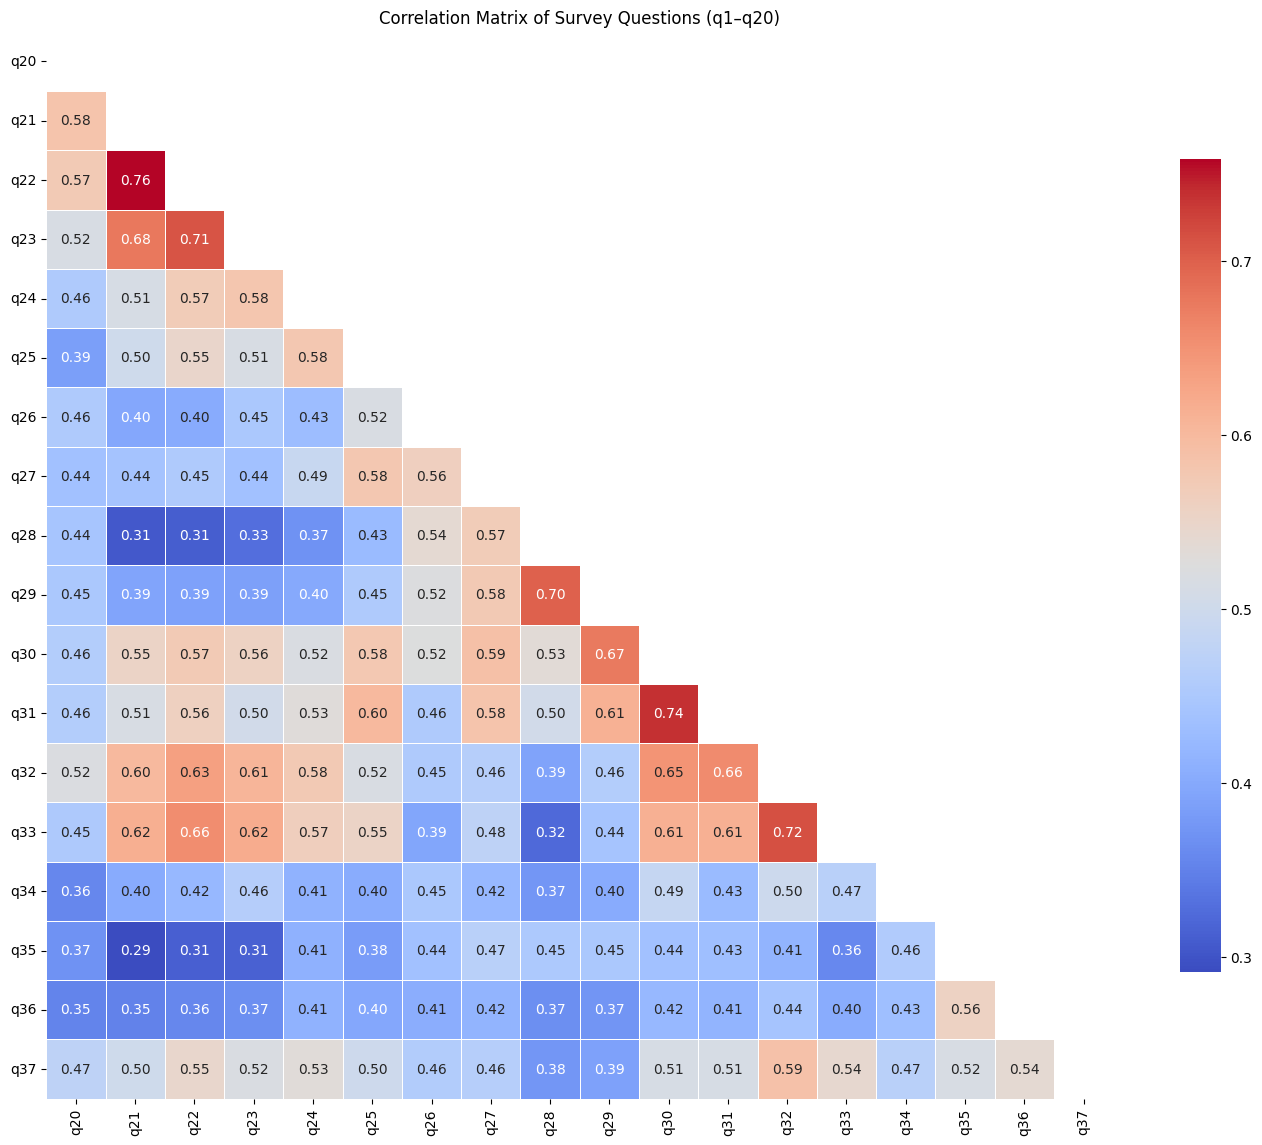

In [11]:
# Step 1: Select q1–q20 columns
q_cols = [f'q{i}' for i in range(20, 38)]
q_df = df[q_cols]

# Step 2: Compute Spearman correlation matrix
corr_matrix = q_df.corr(method='spearman')

# Step 3: Create a mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Step 4: Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix of Survey Questions (q1–q20)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()